## Short Tutorial in the *Retention* Class.
Let's import the class and see insert a some retention numbers.

In [1]:
from pyfreya import Retention

days_since_install = [1, 7, 30]
retention_values= [50, 15, 5]
my_retention = Retention(days_since_install, retention_values)

Lets see what what we have in here:

In [2]:
my_retention

                 Retention
DaysSinceInstall          
1                    50.0%
7                    15.0%
30                    5.0%

Lets fit an equation to this data, default is a power function and as of right now the only available functions build in are

* Power function: $f(x) = k_1x^{k_2}$ identifier: `power` 

In [3]:
my_retention.fit();

Lets see how well it was fitted:

In [4]:
my_retention

                 Retention RetentionFit
DaysSinceInstall                       
1                    50.0%        50.1%
2                     nan%        32.2%
3                     nan%        24.9%
4                     nan%        20.7%
5                     nan%        18.0%
6                     nan%        16.0%
7                    15.0%        14.5%
8                     nan%        13.3%
9                     nan%        12.3%
10                    nan%        11.5%
11                    nan%        10.9%
12                    nan%        10.3%
13                    nan%         9.8%
14                    nan%         9.3%
15                    nan%         8.9%
16                    nan%         8.6%
17                    nan%         8.2%
18                    nan%         7.9%
19                    nan%         7.7%
20                    nan%         7.4%
21                    nan%         7.2%
22                    nan%         7.0%
23                    nan%         6.8%


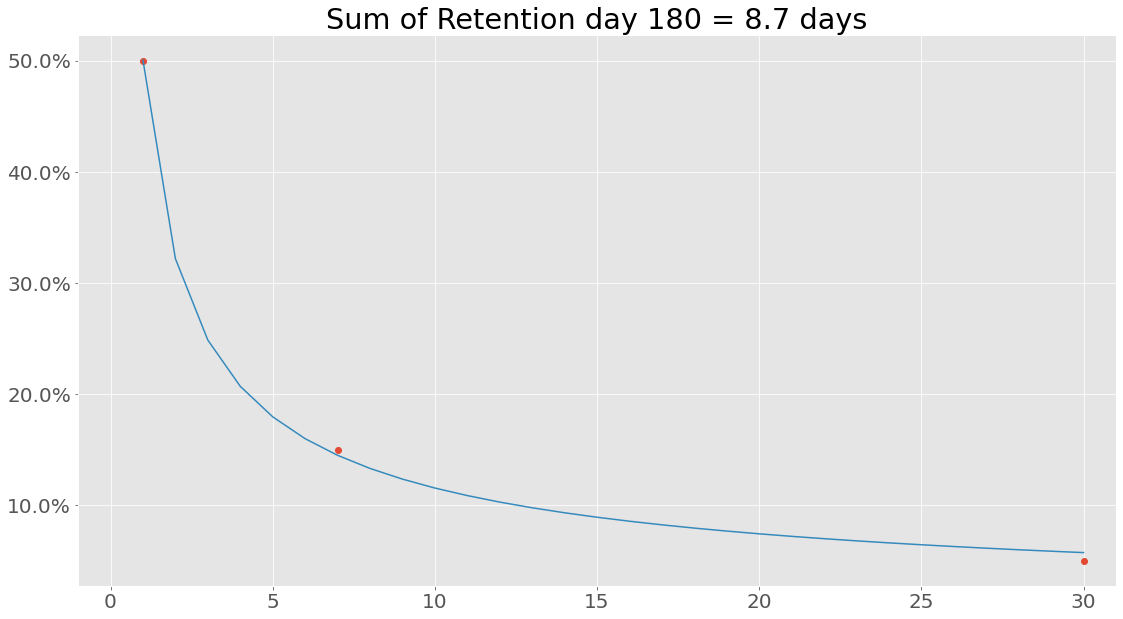

In [5]:
my_retention.plot();

Let's try something interesting - what is the sum of the retention values from the retention array?

In [6]:
import numpy as np

my_retention(np.arange(1,181)).sum()

7.987575025935071

Hmm, that is not the same as the 8.7 calculated using the integrated function of the power equation. At its core the reason for this is that when performing Riemann integration we look at a smooth curve, whereas simply summing retention values from an array we assume a certain linear relationship between point $R(i)$ and $R(i+1)$.

### Custom Functions
In this example, a power function was used, but any callable function can be used.

**NOTE:** It is recommended to use the *Fitfunction* class to create new functions, this class simply needs two functions, the equation used to fit and the integrated equation from *1* to *b*. The integrated function is only used to calculate the summed retention and can be left out. In that case, just pass the callable function directly. Anyway, example with power function and its integrated companion:

$$R(t) = k_1t^{k_2}.$$

The integral from *a* to *b* is simple

$$ \int_a^b R(t) dt = \frac{k_1}{k_2+1}\left( b^{ k_2 + 1} - a^{k_2 + 1}\right) $$

Well... Turns out that fitting is not always 100 % similar to real world data, to not get into some bad situations lets set $a=1$, we can do this, since we know that retention for day 0 is always 1!

$$ \int_1^b R(t) dt + 1= \frac{k_1}{k_2+1}\left( b^{ k_2 + 1} - 1^{k_2 + 1}\right) + 1.$$

Lets create a fitter class for our power function:

In [7]:
from pyfreya import BaseFitFunction

def power(t, k1, k2):
    return k1*t**k2

def power_int(b, fit_params): # Note that all the fitted parameters are included in one list here!
    return fit_params[0] / (fit_params[1] + 1) * (b ** (fit_params[1] + 1) - 1 ** (fit_params[1] + 1)) + 1

MyPowerFitter = BaseFitFunction(power, power_int)

Lets fit with this function:

In [8]:
my_retention.fit(MyPowerFitter);

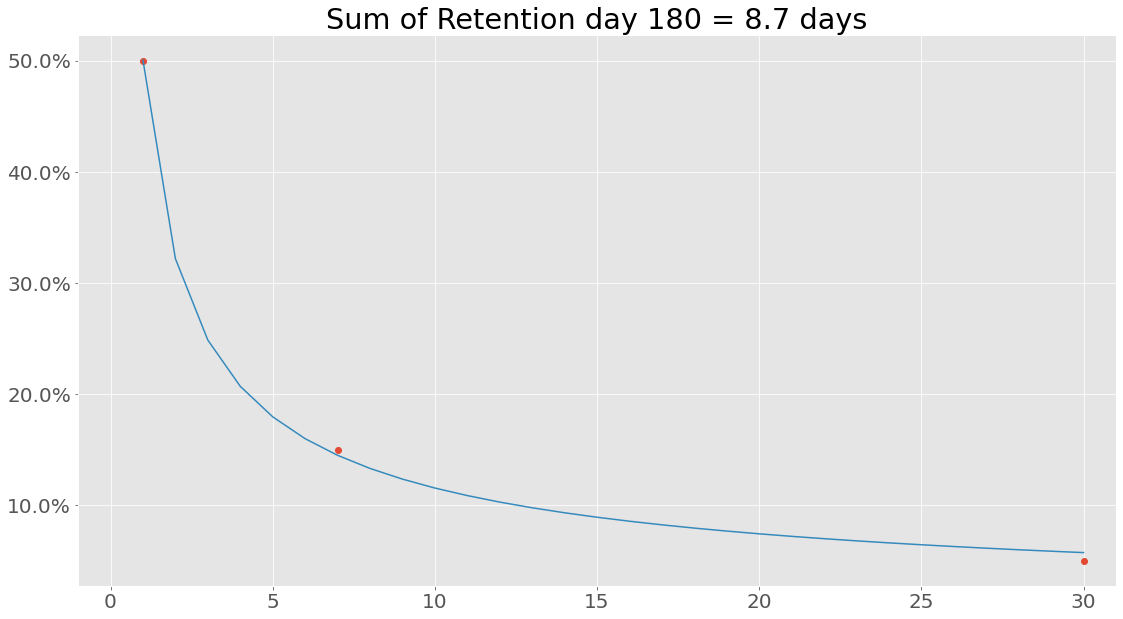

In [9]:
my_retention.plot();

If we are interested in uncertainties the [Uncertainties](https://pypi.org/project/uncertainties/) package have been implemented. This can be used the following way:

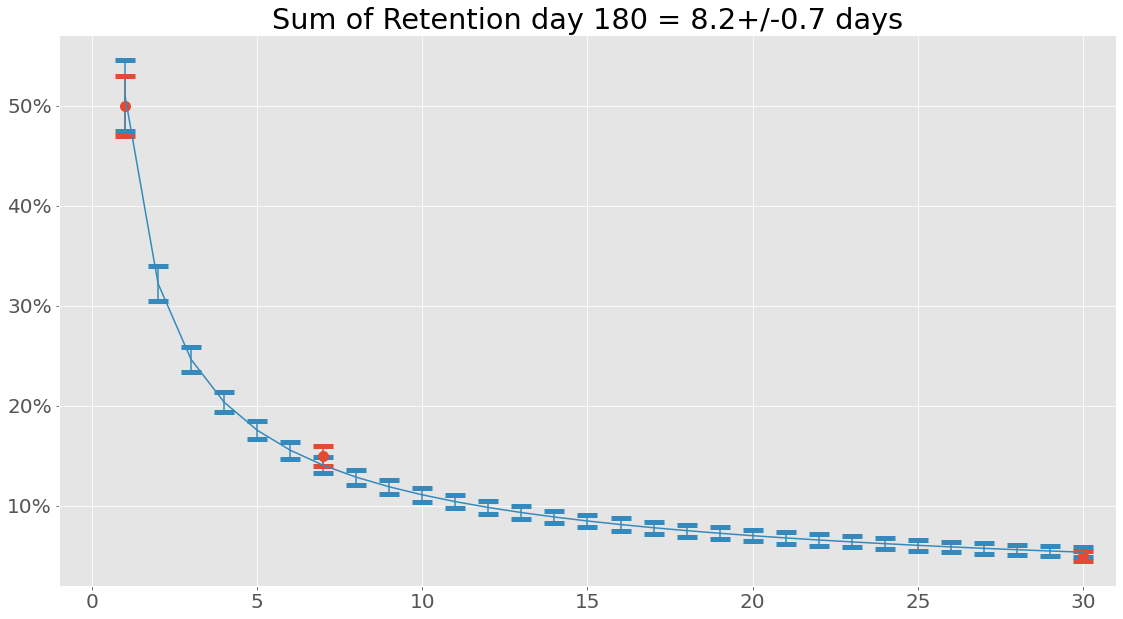

In [10]:
from pyfreya import ufloat

retention_values= [ufloat(50, 3), ufloat(15, 1), ufloat(5, 0.5)]
days_since_install = [1, 7, 30] # no uncertainties here.
my_retention = Retention(days_since_install, retention_values)
my_retention.fit()
my_retention.plot();

When working with uncertainties, the nominal values and the uncertainty values can be obtained with functions `nominal_values` and `std_devs`, respectively:

In [11]:
from pyfreya import nominal_values, std_devs

my_retention.df_retention['RetentionFit']

DaysSinceInstall
1       0.51+/-0.04
2     0.322+/-0.018
3     0.246+/-0.013
4     0.204+/-0.010
5     0.176+/-0.009
6     0.156+/-0.008
7     0.140+/-0.008
8     0.129+/-0.008
9     0.119+/-0.007
10    0.111+/-0.007
11    0.104+/-0.007
12    0.098+/-0.007
13    0.093+/-0.006
14    0.089+/-0.006
15    0.085+/-0.006
16    0.081+/-0.006
17    0.078+/-0.006
18    0.075+/-0.006
19    0.072+/-0.006
20    0.070+/-0.006
21    0.068+/-0.006
22    0.066+/-0.006
23    0.064+/-0.005
24    0.062+/-0.005
25    0.060+/-0.005
26    0.059+/-0.005
27    0.057+/-0.005
28    0.056+/-0.005
29    0.055+/-0.005
30    0.054+/-0.005
Name: RetentionFit, dtype: object

In [12]:
nominal_values(my_retention.df_retention['RetentionFit'])

array([0.51007967, 0.32223477, 0.24631593, 0.20356673, 0.17558734,
       0.1556062 , 0.14049706, 0.12860006, 0.11894522, 0.11092453,
       0.10413587, 0.09830176, 0.09322396, 0.0887568 , 0.0847906 ,
       0.08124106, 0.07804224, 0.07514176, 0.07249742, 0.07007482,
       0.06784561, 0.06578619, 0.06387677, 0.06210058, 0.06044333,
       0.05889276, 0.05743829, 0.05607071, 0.054782  , 0.05356512])

In [13]:
std_devs(my_retention.df_retention['RetentionFit'])

array([0.03564148, 0.01775511, 0.01252601, 0.01027747, 0.00909227,
       0.00837123, 0.00788221, 0.00752197, 0.00723962, 0.00700784,
       0.00681092, 0.00663929, 0.00648677, 0.00634921, 0.0062237 ,
       0.00610815, 0.00600099, 0.005901  , 0.00580724, 0.00571896,
       0.00563553, 0.00555645, 0.00548129, 0.00540969, 0.00534132,
       0.00527593, 0.00521327, 0.00515313, 0.00509533, 0.00503971])

So why bother with this integral function anyway? Well, let's see what happens when we create a data set consisting of retention values from days since install 1 to 180 and sum that using the same power function with the same parameters:

It is also possible to save and load instances of classes (using pickle):

```python
my_retention.save('myretention.pkl')
```

Loading the data is simply done with

```python
import pyfreya
LoadedRetentionClass = pyfreya.load('myretention.pkl')
```